## Transfer Learning Inception V3 using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [15]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [16]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [17]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [18]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [19]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [20]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [21]:

# view the structure of the model
model.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [22]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [23]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [25]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [26]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 75s 1s/step - loss: 2.2969 - accuracy: 0.7437 - val_loss: 0.3778 - val_accuracy: 0.8889
Epoch 2/20
61/61 [==============================] - 75s 1s/step - loss: 0.5794 - accuracy: 0.8898 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 79s 1s/step - loss: 0.5832 - accuracy: 0.9057 - val_loss: 1.0806 - val_accuracy: 0.8333
Epoch 4/20
61/61 [==============================] - 77s 1s/step - loss: 0.5418 - accuracy: 0.9159 - val_loss: 0.0677 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 78s 1s/step - loss: 0.5650 - accuracy: 0.9159 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 78s 1s/step - loss: 0.4690 - accuracy: 0.9308 - val_loss: 0.1863 - val_accuracy: 0.8889
Epoch 7/20
61/61 [==============================] - 86s 1s/step - loss: 0.6864 - accuracy: 0.9057 - val_loss: 8.9729e-04 - val_accuracy: 1.0000
Epoch 8/20
61/61

In [27]:
import matplotlib.pyplot as plt

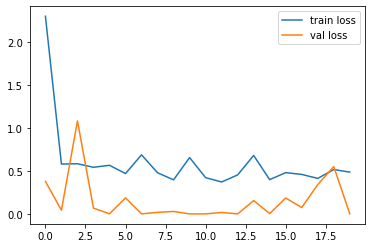

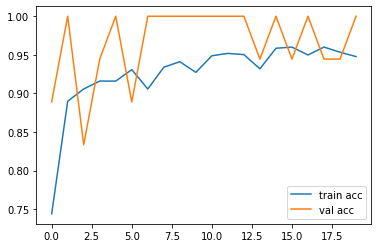

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [30]:

y_pred = model.predict(test_set)


In [31]:
y_pred

array([[2.4268952e-13, 1.9962566e-07, 2.6780886e-15, 9.9999976e-01],
       [1.0000000e+00, 0.0000000e+00, 1.5768622e-37, 0.0000000e+00],
       [3.9458437e-09, 3.6274865e-11, 1.6214022e-08, 1.0000000e+00],
       [1.0000000e+00, 1.8602924e-18, 6.0280134e-37, 2.8776194e-33],
       [5.2301971e-16, 1.0000000e+00, 2.0328117e-10, 2.2054895e-10],
       [0.0000000e+00, 1.0000000e+00, 1.6658717e-24, 1.1002236e-28],
       [3.9993782e-30, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [2.2502487e-19, 3.4569473e-32, 1.0000000e+00, 4.1096975e-22],
       [2.1739078e-32, 0.0000000e+00, 3.1926369e-29, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.2033985e-30],
       [5.0120049e-29, 1.0000000e+00, 8.2829007e-22, 1.3212435e-20],
       [0.0000000e+00, 1.6129109e-19, 1.1747875e-37, 1.0000000e+00],
       [1.8125731e-19, 9.6068446e-19, 1.0000000e+00, 4.1264624e-28],
       [1.0000000e+00, 1.1127828e-32, 2.7302239e-29, 0.0000000e+00],
       [2.8286699e-22, 1.1446076e-

In [32]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [33]:
y_pred

array([3, 0, 3, 0, 1, 1, 2, 2, 3, 1, 1, 3, 2, 0, 2, 2, 1, 3], dtype=int64)

In [34]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [53]:
model=load_model('model_resnet50.h5')

In [54]:
img=image.load_img('Datasets/Test/diseased cotton leaf/dis_leaf (124).jpg',target_size=(224,224))



In [55]:
img_data

array([[[[-0.32549018, -0.34117645, -0.44313723],
         [-0.3490196 , -0.3333333 , -0.4352941 ],
         [-0.3960784 , -0.41176468, -0.5137255 ],
         ...,
         [-0.09019607, -0.24705881, -0.3333333 ],
         [ 0.16078436,  0.00392163, -0.08235294],
         [ 0.05882359, -0.09803921, -0.18431371]],

        [[ 0.05098045,  0.0196079 , -0.06666666],
         [-0.19215685, -0.21568626, -0.3490196 ],
         [-0.2235294 , -0.23921567, -0.34117645],
         ...,
         [-0.17647058, -0.3098039 , -0.372549  ],
         [-0.00392157, -0.1607843 , -0.24705881],
         [-0.00392157, -0.1607843 , -0.24705881]],

        [[ 0.19215691,  0.12156868,  0.082353  ],
         [ 0.27843142,  0.20000005,  0.12156868],
         [-0.372549  , -0.3960784 , -0.5294118 ],
         ...,
         [-0.12156862, -0.25490195, -0.31764704],
         [-0.00392157, -0.1607843 , -0.24705881],
         [-0.01176471, -0.1607843 , -0.27058822]],

        ...,

        [[ 0.33333337,  0.43529415,  0

In [56]:
x=image.img_to_array(img)
x

array([[[ 86.,  84.,  71.],
        [ 83.,  85.,  72.],
        [ 77.,  75.,  62.],
        ...,
        [116.,  96.,  85.],
        [148., 128., 117.],
        [135., 115., 104.]],

       [[134., 130., 119.],
        [103., 100.,  83.],
        [ 99.,  97.,  84.],
        ...,
        [105.,  88.,  80.],
        [127., 107.,  96.],
        [127., 107.,  96.]],

       [[152., 143., 138.],
        [163., 153., 143.],
        [ 80.,  77.,  60.],
        ...,
        [112.,  95.,  87.],
        [127., 107.,  96.],
        [126., 107.,  93.]],

       ...,

       [[170., 183., 137.],
        [114., 116.,  94.],
        [ 88.,  79.,  74.],
        ...,
        [157., 139., 135.],
        [150., 135., 130.],
        [117., 106., 102.]],

       [[151., 157., 119.],
        [ 99.,  93.,  77.],
        [ 95.,  86.,  81.],
        ...,
        [133., 116., 109.],
        [116., 101.,  94.],
        [121., 110., 106.]],

       [[104.,  97.,  79.],
        [ 99.,  90.,  81.],
        [ 88.,  

In [57]:
x.shape

(224, 224, 3)

In [58]:
x=x/255

In [59]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [60]:
model.predict(img_data)

array([[0.12656784, 0.03591638, 0.8230368 , 0.01447903]], dtype=float32)

In [61]:
a=np.argmax(model.predict(img_data), axis=1)

In [62]:
a==1

array([False])

In [63]:
import tensorflow as tf

In [64]:
tf.__version__

'2.3.1'